## for classification

In [ ]:
from class_functions import *
import pickle
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")
fit_funcs = {
    'DecisionTreeClass':DecisionTreeClass,
    'logitridgecv':logitridgecv,
    'logitridge':logitridge,
    'RFclass':RFclass,
    'SVC':kernelSVC,
    'MLPclass':MLPclass
        }

M=200
M = 1000 
n_ratio=int(np.sqrt(N))/N
m_ratio=int(np.sqrt(M))/M
SNR =[0,1,2,3,4,5,6,7,8,9,10]


B=10000
snr = 5 
generate= 'linearsparse'
for fit_func,fit_func_2 in [(DecisionTreeClass,RFclass),(logitridge,logitridgecv),(kernelSVC,kernelSVC)]:
   
    ress={}
    for itrial in range(10):
            if generate=='autosparse':
                X,Y,X1,Y1 =SimuAutoregressiveExactSparseClass(N,M,10000,snr,seed = 123*itrial+456)
            if generate=='linearsparse':
                X,Y,X1,Y1 =SimuExactSparseClass(N,M,10000,snr,seed = 123*itrial+456)
            if generate=='nonlinearsparse':
                X,Y,X1,Y1 =SimuNonlinearExactSparseClass(N,M,10000,snr,seed = 123*itrial+456)
print('LOCOMP')
            res = LOCOMPClass(X,Y,X1,Y1, n_ratio,m_ratio,B,fit_func,0.001,LOCO = True, selected_features=[],alpha=0.1,bonf=False)
            ress[itrial] = res
#             f = open('class/sameM1w_all_locomp_'+generate+'_class_'+fit_func.__name__+'_'+str(size)+'_'+str(m_ratio)+'_'+str(n_ratio)+'_'+str(snr)+'_stab.pkl','wb')                
#             pickle.dump(ress,f)
#             f.close()




## for regression

In [ ]:
import pickle
import sys
from reg_functions import *
fit_funcs = {
    'DecisionTreeReg':DecisionTreeReg,
    'ridgecv':ridgecv,
    'ridge':ridge2,
    'RFreg':RFreg
        }
M=200
M = 1000 
n_ratio=int(np.sqrt(N))/N
m_ratio=int(np.sqrt(M))/M
SNR =[0,1,2,3,4,5,6,7,8,9,10]


B=10000
snr = 5 
generate= 'linearsparse'
for fit_func,fit_func_2 in [(DecisionTreeReg,RFreg),(ridge2,ridgecv), (kernelSVR,kernelSVR)]:   
    ress={}
    for itrial in range(10):
        if generate=='autosparse':
            X,Y,X1,Y1 =SimuAutoregressiveExactSparse(N,M,10000,snr,seed = 123*itrial+456)
        if generate=='linearsparse':
            X,Y,X1,Y1 =SimuRealLinearExactSparse5per(N,M,10000,snr,seed = 123*itrial+456)
        if generate=='nonlinearsparse':
            X,Y,X1,Y1 =SimuNonlinearExactSparse(N,M,10000,snr,seed = 123*itrial+456)
        print('LOCOMP')
        res = LOCOMPReg(X,Y,X1,Y1, n_ratio,m_ratio,B,fit_func,0.001,LOCO = True, selected_features=[],alpha=0.1,bonf=False)
        ress[itrial] = res
#             f = open('Reg/sameM1w_all_locomp_'+generate+'_Reg_'+fit_func.__name__+'_'+str(size)+'_'+str(m_ratio)+'_'+str(n_ratio)+'_'+str(snr)+'_stab.pkl','wb')                
#             pickle.dump(ress,f)
#             f.close()





## for feature interaction

In [54]:
import numpy as np

from reg_functions import *
from LOCO_regression import *
from ML_models import *

M = 20 # keep 5 nonzeros
N = 200
n_ratio = int(np.sqrt(N)) / N
m_ratio = int(np.sqrt(M)) / M

B = 1000
SNR = np.linspace(0, 1, 10)
num_trials = 10
ress = {}
fit_func = DecisionTreeReg


"""
Rewrite code from scratch

"""


for i, snr in enumerate(SNR):
    for itrial in range(num_trials):
        X,Y,X1,Y1 = SimuRealLinearExactSparse5per(N,M,10000,snr,seed = 123*itrial+456)
        Y += snr * (X[:,0] * X[:,1])
        print(f"LOCOMP {itrial}")


        res = LOCOMPReg(X,Y,n_ratio,m_ratio,B,fit_func,selected_features=[],alpha=0.1,bonf=False)
        ress[(i, itrial)] = res



LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9
LOCOMP 0
LOCOMP 1
LOCOMP 2
LOCOMP 3
LOCOMP 4
LOCOMP 5
LOCOMP 6
LOCOMP 7
LOCOMP 8
LOCOMP 9


In [51]:
import matplotlib.pyplot as plt

LEFT = 2
RIGHT = 3
FEATURE = 0

plt_power = [0] * len(SNR)
errors = [0] * len(SNR)

for i, snr in enumerate(SNR):
    power = [0] * num_trials
    for itrial in range(num_trials):
        loco_ci = ress[(i, itrial)]['loco_ci']
        if loco_ci[FEATURE][LEFT] > 0 or loco_ci[FEATURE][RIGHT] < 0:
            power[itrial] = 1
    errors[i] = np.std(power)
    plt_power[i] = np.mean(power)


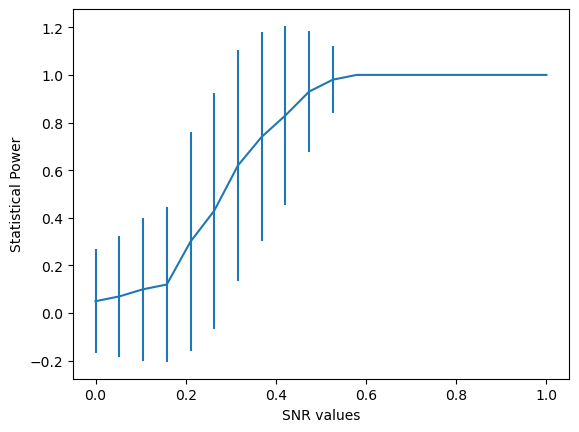

In [43]:
plotline, caplines, barlinecols = plt.errorbar(SNR, plt_power, yerr = errors)
plt.xlabel("SNR values")
plt.ylabel("Statistical Power")
plt.show()

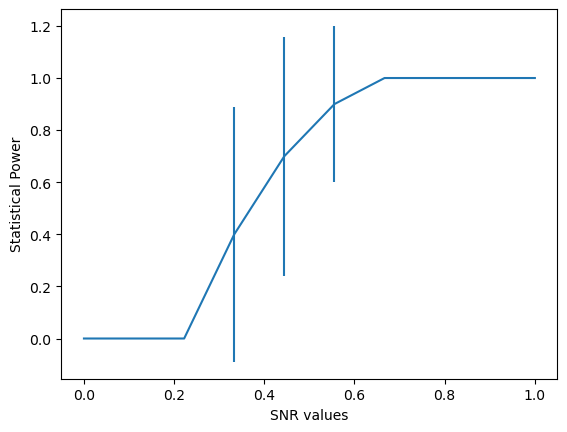

In [52]:
plotline, caplines, barlinecols = plt.errorbar(SNR, plt_power, yerr = errors)
plt.xlabel("SNR values")
plt.ylabel("Statistical Power")
plt.show()

In [32]:
plotline

In [46]:
Y

array([ 0.58468103,  0.31602174, -0.49605023,  0.05707445, -0.78658212,
       -0.08544524, -1.74660505,  1.15943453,  0.17798461, -0.20837539,
       -0.47299095,  0.39972846, -2.25463606,  0.5561292 , -0.67605727,
       -0.20974832,  0.35217854, -0.74696645, -1.88544552, -2.83008368,
       -0.44879476, -0.04489948,  0.56619495,  0.27306796,  1.27361883,
       -0.11412602, -0.5811304 , -1.0095698 ,  0.71207102, -1.68953147,
       -0.71378781,  0.13123079,  0.00784074,  1.53259052,  0.98480456,
        0.56065624, -1.00764349,  0.2394094 ,  0.15579319, -2.05882464,
       -0.92959063,  0.94175992,  0.37349544, -0.0253693 ,  1.0807455 ,
        1.78087877, -0.59596111,  1.5885801 ,  0.69824864,  0.04111788,
       -0.38044326,  0.7417717 , -0.03092576,  0.17669581, -0.1200713 ,
       -0.0459796 ,  0.85887827,  0.08103383,  1.08427508,  0.59045507,
       -1.69804629, -0.46442125,  0.00362633,  1.80669822, -0.9286024 ,
       -0.01546684,  0.0987499 , -0.79804085, -0.34803543, -0.16

In [28]:
plt_power[1000:-1]

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


array([ 1.29450245,  0.499339  ,  0.32665227,  0.44837161, -1.52469632,
       -2.57377771, -0.11458503,  0.55060282,  0.66156811,  0.03886348,
        3.1894978 ,  2.11583087, -0.80319919, -1.95708613,  0.13276583,
        0.02033508,  0.24442429, -0.00616373,  1.18518814,  0.0323858 ,
       -0.27245025, -0.97112418, -0.92093336, -0.56434741,  0.54592984,
       -0.00494568,  1.7754066 , -0.2505648 , -0.55394092,  0.05521739,
       -1.18269561, -0.6458003 , -0.03400921, -1.8294497 , -1.0030427 ,
       -0.82398814,  0.28802712, -0.59150829,  1.7001814 , -0.069319  ,
        1.29539483, -0.34601299,  0.85894701, -0.98648895,  2.08634297,
        0.62043757, -0.13910701,  0.05368845,  1.66417032, -0.43866309,
        0.64382305,  0.58925161, -0.14641222, -0.60552647,  0.27139793,
       -0.95327475, -0.00484316, -0.24372924, -0.28616638, -0.37678009,
        0.12714063, -0.06168224,  1.4330927 , -1.34022719, -0.77096422,
       -1.68820249, -0.05992785, -0.2754434 ,  0.35135393, -0.01

In [18]:
significance

[0.1, 0.1, 0.3, 0.7, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0]